# Importing Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from collections import Counter
import re

from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_predict

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
fees=pd.read_excel('Final_Train.xlsx')

In [3]:
fees.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
fees.shape

(5961, 7)

# Data Preprocessing

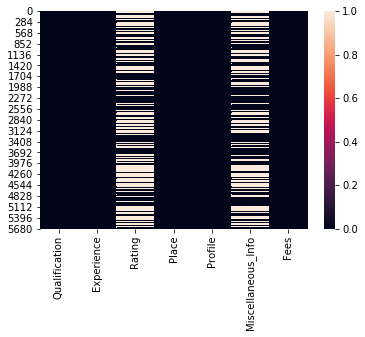

In [5]:
sns.heatmap(fees.isnull())

From above you can see that htere is outliers present in this dataset ,and next step here is cleaning..

In [6]:
fees['City'] =fees['Place'].str.split(', ').str[-1]
fees['Area'] = fees['Place'].str.split(', ').str[0]

In [7]:
fees.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [8]:
fees=fees.drop('Place',axis=1)

In [9]:
fees.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24 years experience,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


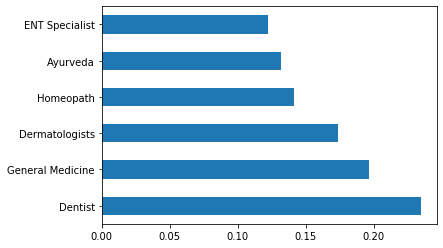

In [10]:
fees['Profile'].value_counts(normalize=True).plot(kind='barh')

In [11]:
count = fees.groupby(['City']).count()
count.Qualification


City
Bangalore             1258
Chennai                855
Coimbatore             228
Delhi                 1185
Ernakulam              153
Hyderabad              951
Mumbai                1219
Thiruvananthapuram      86
e                        1
Name: Qualification, dtype: int64

In [12]:
val = fees[fees['City'] == 'e'].index
val

Int64Index([3980], dtype='int64')

In [13]:
fees = fees.drop([3980])

In [14]:
fees['Experience'] = fees['Experience'].apply(lambda x : re.findall(r'^\d\d?', x)[0]).astype(int)

In [15]:
fees['Rating'].fillna('0%',inplace = True)
fees['Rating'] = fees['Rating'].str[0:-1].astype(float)

In [16]:
fees.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,0.0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [17]:
fees['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [18]:
temp = pd.get_dummies(fees[['Profile', 'City']], prefix_sep = '_', prefix = ['Profile', 'City'])
fees = pd.concat([fees, temp], axis=1, join = 'inner')
fees.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,Profile_Dentist,...,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,0,...,0,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,0,...,0,0,1,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0.0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,0,0,...,0,0,1,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,0,...,0,0,1,0,0,0,0,0,0,0
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
fees=fees.drop('Profile',axis=1)

In [20]:
def sortQual(text):
    arr = re.sub(r'\(.*?\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return (sorted(arr.lower().replace(" ","").split(",")))

In [21]:
fees['Qualification'] = fees['Qualification'].apply(lambda x : sortQual(x))

In [22]:
qual_dict = {}

train_quals = []
test_quals = []

train_quals.append(list(fees['Qualification'].values))

for quals in train_quals[0]:
    for item in quals:
        if item in qual_dict:
            qual_dict[item] += 1
        else:
            qual_dict[item] = 1
            

            
# qual_dict['Empty'] = 0

In [23]:
qual_df = pd.DataFrame.from_dict(dict(sorted(qual_dict.items(), key = lambda x : x[1] , reverse = True)), orient = 'index').reset_index()
qual_df.columns = ['Qualification', 'Count']
qual_df.head()


,Qualification,Count
0,mbbs,2808
1,bds,1362
2,bams,764
3,bhms,749
4,md-dermatology,606


In [24]:
x = qual_df[qual_df['Qualification'] == '39yearsexperience'].index
qual_df = qual_df.drop(x)


In [25]:
qual_df["Code"] = qual_df["Qualification"].astype('category').cat.codes
qual_df.head()

,Qualification,Count,Code
0,mbbs,2808,500
1,bds,1362,25
2,bams,764,23
3,bhms,749,27
4,md-dermatology,606,533


In [26]:
conversion_dict = dict(zip(qual_df['Qualification'], qual_df['Code']))
conversion_dict['39yearsexperience'] = -1

In [27]:
stat_train = fees.Qualification.apply(lambda x: len(x))
stat_train.max()

10

In [28]:
train_quals = []
for i in range(stat_train.max()):
    col_name = 'Qual_' + str(i+1)
    train_quals.append(col_name)
    col_i =fees['Qualification'].str[i]
    fees[col_name] = col_i
#     df_train[col_name] = df_train[col_name].fillna("Empty")  
fees.head()

,Qualification,Experience,Rating,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,...,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"[bhms, md-homeopathy]",24,100.0,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,0,0,...,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[bams, md-ayurvedamedicine]",12,98.0,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,0,0,...,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[mbbs, ms-otorhinolaryngology]",9,0.0,NaN,300,Bangalore,Mathikere - BEL,0,0,0,...,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[bams, bsc-zoology]",12,0.0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,0,0,...,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[bams],20,100.0,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,0,0,...,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
for i in train_quals:
    fees.replace({i: conversion_dict}, inplace=True)
    fees[i] = fees[i].fillna(-1)

In [30]:
fees.head()

,Qualification,Experience,Rating,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,...,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"[bhms, md-homeopathy]",24,100.0,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,0,0,...,27,541,-1,-1,-1,-1,-1,-1,-1,-1
1,"[bams, md-ayurvedamedicine]",12,98.0,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,0,0,...,23,525,-1,-1,-1,-1,-1,-1,-1,-1
2,"[mbbs, ms-otorhinolaryngology]",9,0.0,NaN,300,Bangalore,Mathikere - BEL,0,0,0,...,500,649,-1,-1,-1,-1,-1,-1,-1,-1
3,"[bams, bsc-zoology]",12,0.0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,0,0,...,23,33,-1,-1,-1,-1,-1,-1,-1,-1
4,[bams],20,100.0,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,0,0,...,23,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [31]:
fees=fees.drop('Qualification',axis=1)

In [32]:
fees['Area'].unique()[:10]

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani'], dtype=object)

In [33]:
temp=fees['Area'].unique()

In [34]:
area_df = pd.DataFrame(temp, columns = ['Area'])
area_df['Codes'] = area_df['Area'].astype('category').cat.codes
# scaler = StandardScaler()
# area_df['Codes'] = scaler.fit_transform(area_df['Codes'].values.reshape(-1,1))
area_codes_dict = dict(zip(area_df['Area'], area_df['Codes']))

In [35]:
fees.replace({'Area': area_codes_dict}, inplace=True)
fees['Area'] = fees['Area'].fillna(-1)

In [36]:
fees.head()

,Experience,Rating,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,...,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,296,0,0,0,0,...,27,541,-1,-1,-1,-1,-1,-1,-1,-1
1,12,98.0,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,855,1,0,0,0,...,23,525,-1,-1,-1,-1,-1,-1,-1,-1
2,9,0.0,NaN,300,Bangalore,452,0,0,0,1,...,500,649,-1,-1,-1,-1,-1,-1,-1,-1
3,12,0.0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,68,1,0,0,0,...,23,33,-1,-1,-1,-1,-1,-1,-1,-1
4,20,100.0,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,335,1,0,0,0,...,23,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [37]:
fees=fees.drop('Miscellaneous_Info',axis=1)

In [40]:
fees=fees.fillna(0)

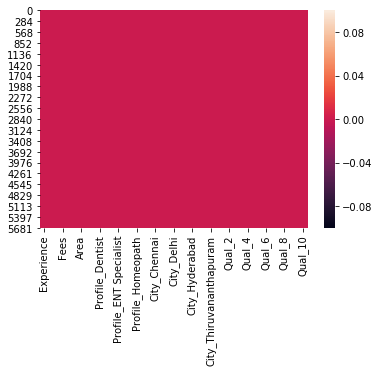

In [41]:
sns.heatmap(fees.isnull())

From above you can see that now data look's like perfect.

In [42]:
selected_cols = [i for i in fees.columns if i not in ['Qualification', 'Place', 'Miscellaneous_Info', 'City', 'Fees', 'Profile', 'Rev_Len', 'Experience', 'Rating']]

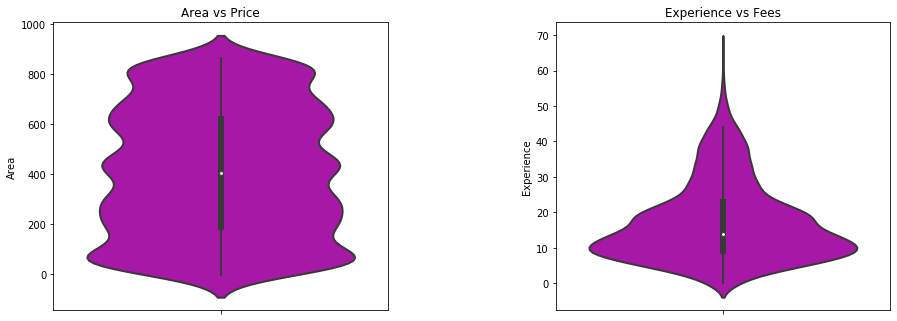

In [43]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(121)
plt.title('Area vs Price')
sns.violinplot(y='Area',data=fees,color='m',linewidth=2)
plt.subplot(122)
plt.title('Experience vs Fees')
sns.violinplot(y='Experience',data=fees,color='m',linewidth=2)

Experience                     AxesSubplot(0.125,0.772143;0.133621x0.107857)
Rating                      AxesSubplot(0.285345,0.772143;0.133621x0.107857)
Fees                         AxesSubplot(0.44569,0.772143;0.133621x0.107857)
Area                        AxesSubplot(0.606034,0.772143;0.133621x0.107857)
Profile_Ayurveda            AxesSubplot(0.766379,0.772143;0.133621x0.107857)
Profile_Dentist                AxesSubplot(0.125,0.642714;0.133621x0.107857)
Profile_Dermatologists      AxesSubplot(0.285345,0.642714;0.133621x0.107857)
Profile_ENT Specialist       AxesSubplot(0.44569,0.642714;0.133621x0.107857)
Profile_General Medicine    AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Profile_Homeopath           AxesSubplot(0.766379,0.642714;0.133621x0.107857)
City_Bangalore                 AxesSubplot(0.125,0.513286;0.133621x0.107857)
City_Chennai                AxesSubplot(0.285345,0.513286;0.133621x0.107857)
City_Coimbatore              AxesSubplot(0.44569,0.513286;0.133621x0.107857)

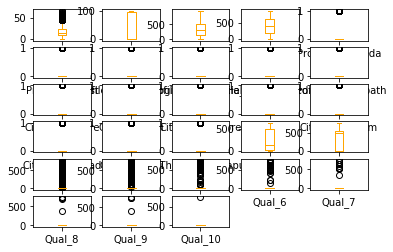

In [44]:
fees.plot.box(subplots=True,layout=(6,5),color='orange')

From here data contains lot of outliers.

# Building a Machine Learning Model

In [45]:
x = fees[selected_cols]
y = fees['Fees']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=41)

In [46]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [47]:
from sklearn.svm import SVR
reg = SVR(gamma = 0.1)
reg.fit(x_train,y_train)
ans = reg.predict(scaler.transform(x_test))

In [48]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [49]:
score(ans,y_test)

0.7737373712257904

In [50]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
scorer = make_scorer(score,greater_is_better=True)

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg2 = GridSearchCV(reg,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)

In [52]:
reg2.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma=0.1, kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(score), verbose=0)

In [53]:
ans2 = reg2.predict(scaler.transform(x_test))

In [54]:
score(ans2, y_test)

0.780525437783761

In [55]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
x = scaler.fit_transform(fees[selected_cols])
y = fees['Fees']

reg3 = SVR(gamma = 0.1)
reg3.fit(x_train,y_train)

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg4 = GridSearchCV(reg3,param_grid=parameters,scoring='r2', n_jobs=-1,cv=4)
reg4.fit(x,y)
ans = reg4.predict(x_test)

In [56]:
ansx = reg4.predict(x)
print("Training data score {}".format(score(y, ansx)))

Training data score 0.8075831548457182


# Saving Model

In [57]:
fees=pd.DataFrame(ansx)
fees.to_csv('rfr_fees.csv')

In [58]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(reg4,'fees.obj')
#load the model from a file
svr_from_joblib=joblib.load('fees.obj')
#use the loaded model to make prediction
svr_from_joblib.predict(x_test)

array([268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63675657,
       268.63675657, 268.63675657, 268.63675657, 268.63

It's perfect upto now ..